<a href="https://colab.research.google.com/github/iamVaibhav100/multilevel_dog_breed_classification/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-End Multi-level Dog breed Classification

Building an end-to-end multi-level dog breed classifier using TensorFlow.

### 1. Problem

Given an image of a dog, identify the breed.

### 2. Data

Data used is from Kaggle's dog breed identification competition.

Link : https://www.kaggle.com/c/dog-breed-identification/data

### 3. Evaluation

Evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

### 4. Features

Information about the data used:
* Data is a collection of images (unstructured data) hence deep learning approach is used.
* There are 120 different breeds of dogs available in the data used.
* There are around 10,000+ images for training set (labelled data).
* There are around 10,000+ images for testing set (no label).


In [1]:
#!unzip "drive/MyDrive/Dog_Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog_Vision"

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
print("version:", hub.__version__)
print("version:", tf.__version__)

# checking for GPU avalability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

version: 0.12.0
version: 2.9.2
GPU available


## Getting data ready
Converting the images into Tensors (numerical representation)

In [3]:
# importing libraries
import pandas as pd
labels = pd.read_csv("drive/MyDrive/Dog_Vision/labels.csv")
print(labels.describe())
print(labels.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


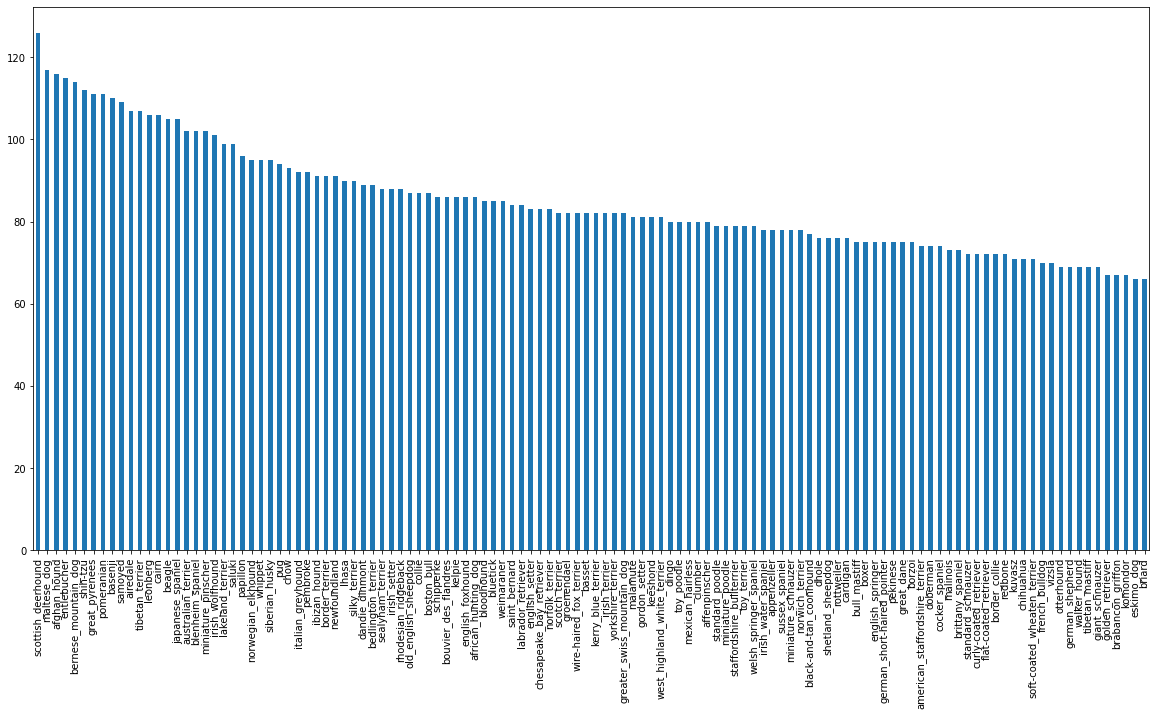

In [4]:
# How many images of each breed
labels["breed"].value_counts().plot.bar(figsize=(20, 10));

## Getting file paths for each image
creating a list of file paths for each path from labesls

In [5]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


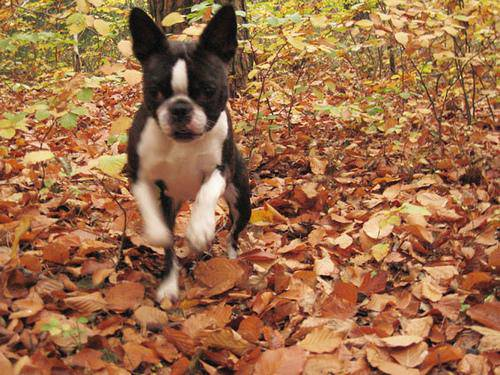

In [6]:
from IPython.display import Image
Image("drive/MyDrive/Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [7]:
filepaths = ["drive/MyDrive/Dog_Vision/train/" + fname + ".jpg" for fname in labels["id"]]
filepaths[:10]

['drive/MyDrive/Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog_Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog_Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog_Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog_Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog_Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog_Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog_Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog_Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [8]:
# Checking if number of filepaths matches the number of images in train folder
import os
if len(os.listdir("drive/MyDrive/Dog_Vision/train/")) == len(filepaths):
  print("Matches, proceed")
else:
  print("length does not match!")

Matches, proceed


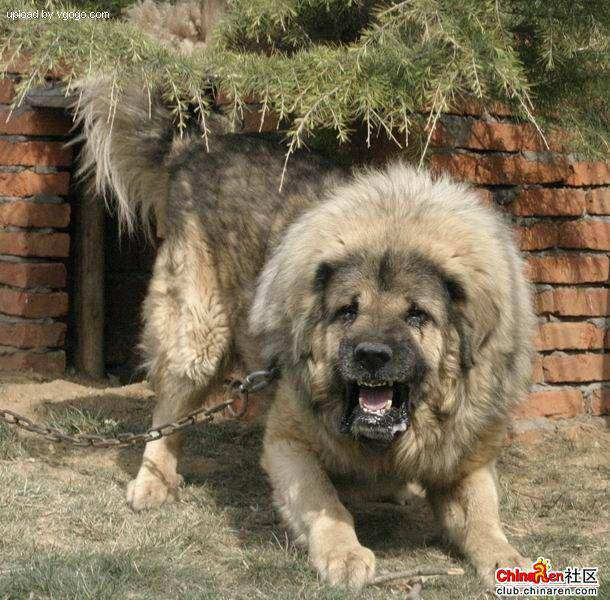

In [9]:
Image(filepaths[9000])

## Turning labels (breeds) into numbers
Taking breed column from labels csv file and turning it into numerical form

In [10]:
import numpy as np
breeds = labels["breed"].to_numpy()
len(breeds)

10222

In [11]:
unique_breeds = np.unique(breeds)
len(unique_breeds)

120

In [12]:
# Taking single breed and turning it into a boolean array
breeds[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [13]:
# Turning every breed label into boolean arrays
boolean_labels = [breed == unique_breeds for breed in breeds]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [14]:
len(boolean_labels)

10222

In [15]:
# Turning the boolean arrays into 1 and 0
print(breeds[0]) # original breed name
print(np.where(unique_breeds == breeds[0])) # index where the original breed name occurs
print(boolean_labels[0].argmax()) # index where breed name occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be 1 where the breed name occurs in boolean array

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating a validation set
splitting the data into test and train and experimenting with the results

In [16]:
# Setup X & Y variables
X = filepaths
Y = boolean_labels

# Experimenting with ~1000 images first
NUM_IMAGES = 1000 #@param {type: "slider", min:1000, max:10000, step:1000}

In [17]:
# Splitting the data into train and validation set
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X[:NUM_IMAGES],
                                                   Y[:NUM_IMAGES],
                                                   test_size=0.2,
                                                   random_state=42)
len(X_train), len(X_val), len(Y_train), len(Y_val)

(800, 200, 800, 200)

In [18]:
X_train[:5], Y_train[:2]

(['drive/MyDrive/Dog_Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog_Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Dog_Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Dog_Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Dog_Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

### Preprocessing images (Turning images into tensors)

Writing a function that:
* takes filepath as input
* Use tensorflow to read image and save it to a variable named image
* Turn image into tendor
* Resize image to be a shape of (224, 224)
* Return the modified image

In [19]:
# Convert image to numpy array
from matplotlib.pyplot import imread
image = imread(filepaths[42])
image.shape

(257, 350, 3)

In [20]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [21]:
# Turning image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [22]:
# define image size
IMG_SIZE = 224

# define function to preprocess the images
def process_image(image_path, image_size=IMG_SIZE):
  """
  Takes image filepath and converts it into a tensor
  """

  # Read image
  image = tf.io.read_file(image_path)
  # turn jpeg image into a tensor with 3 color channels (RGB)
  image = tf.image.decode_jpeg(image, channels=3)
  # convert color channel values from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize image
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

### Creating batches for data

Batch is a subset of the full dataset, containing a small number of examples from the full dataset.

* Training on mini-batches can be faster than training on the full dataset, especially when the dataset is large and the model is complex.
* Training on mini-batches can be more memory-efficient than training on the full dataset, especially when the dataset is very large.

In this case to use tensorflow effectively, data is represented in form of a tuple: `(image, label)`

In [23]:
# Function that returns the desired tuple (image, label)
def get_tuple(image_path, label):
  """
  takes image path with its associated label, returns processed image and label
  """
  image = process_image(image_path)
  return image, label

### Function to turn data into batches
Above function gives a tuple with image and its label.
This function will create batches for all the data.

In [24]:
# define batch size
BATCH_SIZE = 32

# function to create batches
def create_batches(X, Y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data from image (X) and label (Y) pairs
  Shuffles the data if it's training data but not when it's validation data
  Also accepts test data as input (no label)
  """

  if test_data:
    print("Creating test batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only file paths no labels
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # no need to shuffle the data if it's vaildation data set
  if valid_data:
    print("Creating validation batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                              tf.constant(Y))) # labels

    data_batch = data.map(get_tuple).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training batches...")
    # turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                              tf.constant(Y)))
    
    # shuffling pathnames and labels
    data = data.shuffle(buffer_size=len(X))

    # create (image, label) tuple (also turning image path into preprocessed image)
    data = data.map(get_tuple)

    # turn data into batch
    data_batch = data.batch(BATCH_SIZE)

  return data_batch

  



In [25]:
# creating training and validation data batches
train_data = create_batches(X_train, Y_train)
val_data = create_batches(X_val, Y_val, valid_data=True)

# check different attributes of the crated batches
train_data.element_spec, val_data.element_spec

Creating training batches...
Creating validation batches...


((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualizing the data batches
Data are now in the form of different batches and below function is used to visually represent them.

In [26]:
import matplotlib.pyplot as plt

# function to visualize the batches
def show_25_images(images, labels):
  """
  Displays 25 images with their labels in the data batch
  """
  # setup figure
  plt.figure(figsize=(10,10))
  # loop through the 25 images
  for i in range(25):
    # define subplot (5 rows, columns)
    ax = plt.subplot(5, 5, i+1)
    # Display the image
    plt.imshow(images[i])
    # add image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")


In [27]:
# To visualize, convert the data batch into an iterator
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

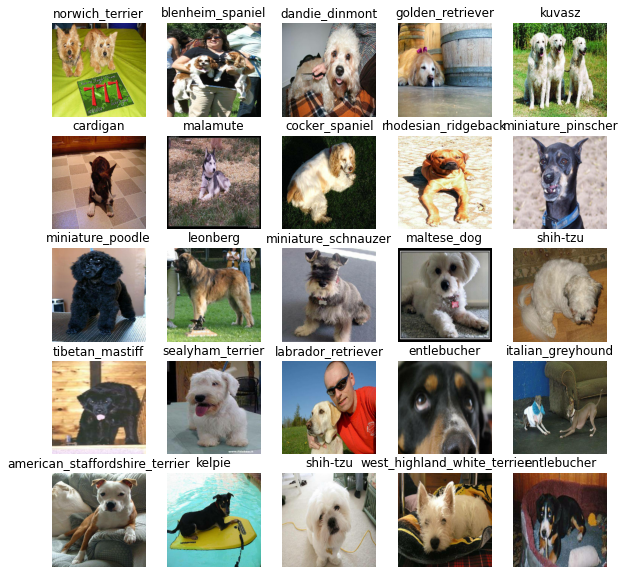

In [28]:
# Visualize the data now
show_25_images(train_images, train_labels)

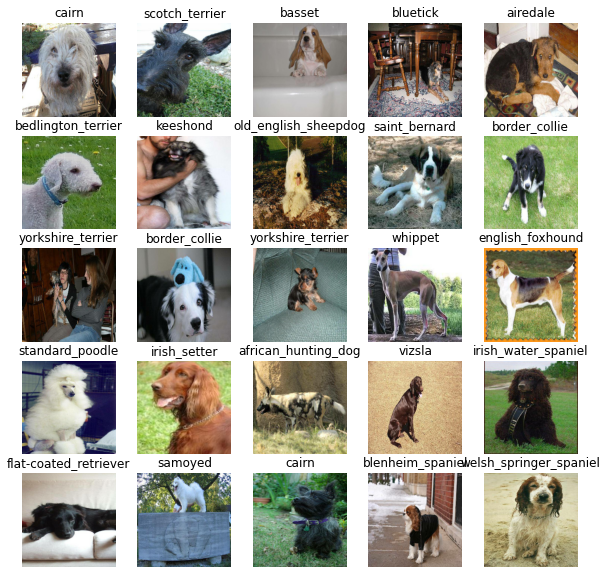

In [29]:
# Visualizing validation data set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building the model
define:
* The input shape (images shape, in form of tensor) to the model
* The output shape (image labels, in form of tensors) to the model
* link to the model that will be used - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5

In [46]:
# input shape
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channel

# output shape
OUTPUT_SHAPE = len(unique_breeds)

# link to the model
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"


### Function to build the model
This function does the following:
* Takes the input shape, output shape and the model
* Defines the leyars in keras model in sequential fashion
* Compiles and returns the build model

In [47]:
# writing the function
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building the model with:", MODEL_URL)

  # setup model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), # layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax") # layer 2 (output layer)
  ])

  # compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  # build the model
  model.build(INPUT_SHAPE)

  return model

In [48]:
model = create_model()
model.summary()

Building the model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_4 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### Creating callbacks
Callbacks are helper functions a model can use during training to save its progress, check the progress, stop training for too long, etc.

Creating two callback:
* First for TensorBoard which helps tracks the model progress
* Second for early stoping which prevents the model from training too long